Epoch 1/5
2100/2100 [==============================] - 7s 2ms/step - loss: 1.2112 - accuracy: 0.5346 - val_loss: 0.6498 - val_accuracy: 0.7979
Epoch 2/5
2100/2100 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8518 - val_loss: 0.3809 - val_accuracy: 0.8929
Epoch 3/5
2100/2100 [==============================] - 5s 2ms/step - loss: 0.3798 - accuracy: 0.8947 - val_loss: 0.3526 - val_accuracy: 0.9031
Epoch 4/5
2100/2100 [==============================] - 5s 2ms/step - loss: 0.3298 - accuracy: 0.9088 - val_loss: 0.2935 - val_accuracy: 0.9169
Epoch 5/5
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.9156 - val_loss: 0.3549 - val_accuracy: 0.8992
모델 평가
313/313 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.9009
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 

AttributeError: 'Axes' object has no attribute 'ylim'

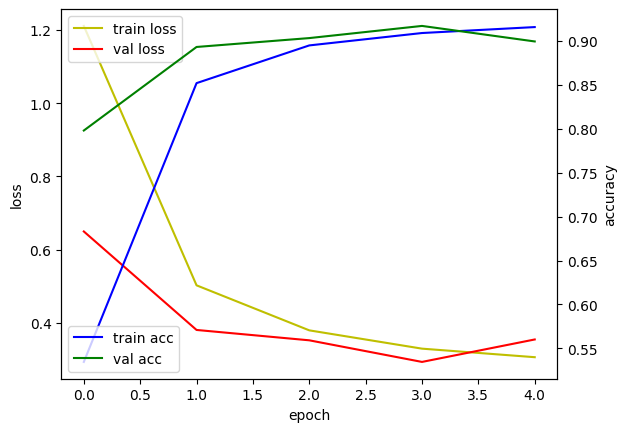

In [41]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


def load_data():

    # MNIST 데이터셋 가져오기
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

    # tf.data를 사용하여 데이터셋을 섞고 배치 만들기
    ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
    train_size = int(len(x_train) * 0.7)

    train_ds = ds.take(train_size).batch(20)
    val_ds = ds.skip(train_size).batch(20)

    return train_ds, val_ds


def model_compile_and_fit(train_ds, val_ds, in_epoch=5, opt='adam', num_hidden=2):

    # MNIST 분류 모델 구성
    model = Sequential()

    # set input layer
    model.add(Flatten(input_shape=(28, 28)))

    # set hidden layer
    for i in range(num_hidden):
        model.add(Dense(20, activation='relu'))
    
    # set ouput layer
    model.add(Dense(10, activation='softmax'))

    # 모델 생성
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # 모델 학습
    hist = model.fit(train_ds, validation_data=val_ds, epochs=in_epoch)

    return model, hist


def model_evaluate(model):

    # 모델 평가
    print('모델 평가')
    model.evaluate(x_test, y_test)



def model_save(in_name, model):

    # 모델 저장
    model.save(in_name)


def plot_loss(hist, plot_name):

    # 학습 결과 그래프 그리기
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    acc_ax.ylim(0.6, 1)
    loss_ax.ylim(0.2, 1)
    plt.show()
    plt.savefig(plot_name)



if __name__ == '__main__':

    # data load
    train_ds, val_ds = load_data()

    # 모델 설정 및 학습
    mdl_dir = "../MODL/"
    set_opt = "adam"
    num_hidden = 20
    num_epoch = 10
    model_name = mdl_dir + "mnist_model" + f"_setopt{set_opt}" + f"_epoch{num_epoch}" + f"_numh{num_hidden}" + ".h5"

    model, hist = model_compile_and_fit(train_ds, val_ds, 5, set_opt, num_hidden)
    #model_epoch20, hist_epoch20 = model_compile_and_fit(20)

    # model eval
    model_evaluate(model)
    #model_evaluate(model_epoch20)

    # 모델 정보 출력
    model.summary()
    #model_epoch20.summary()

    # model save
    model_save(in_name=model_name, model=model)
    #model_save(in_name="mnist_model_epoch20.h5", model=model_epoch20)

    # plot
    plot_name = mdl_dir + "mnist_model" + f"_setopt{set_opt}" + f"_epoch{num_epoch}" + f"_numh{num_hidden}"
    plot_loss(hist, plot_name)



In [42]:
import random
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

random.seed(1)

load_data()

model1 = load_model('../MODL/mnist_model_setoptadam_epoch5_numh1.h5')
model2 = load_model('../MODL/mnist_model_setoptadam_epoch5_numh3.h5')
model3 = load_model('../MODL/mnist_model_setoptadam_epoch5_numh5.h5')

predict1 = model1.predict(x_test).argmax(axis=1)
predict2 = model2.predict(x_test).argmax(axis=1)
predict3 = model3.predict(x_test).argmax(axis=1)

print(y_test.shape)
print(predict1.shape)
print(classification_report(y_test, predict1))
print(classification_report(y_test, predict2))
print(classification_report(y_test, predict3))

# for i in range(30):
#     ran_int = random.randint(1, 10000)
#     # 테스트셋에서 20번째 이미지 출력    
#     plt.imshow(x_test[ran_int], cmap="gray")
#     #plt.show()
#     # 테스트셋의 20번째 이미지 클래스 분류
#     picks = [ran_int]
#     #predict = model.predict_classes(x_test[picks])
#     predict1 = model1.predict(x_test[picks])
#     predict2 = model2.predict(x_test[picks])
#     predict3 = model3.predict(x_test[picks])

#     predicted1 = predict1.argmax(axis=-1)
#     predicted2 = predict2.argmax(axis=-1)
#     predicted3 = predict3.argmax(axis=-1)
#     print("손글씨 이미지 예측값 : ", predicted1, y_test[picks])
#     print("손글씨 이미지 예측값 : ", predicted2, y_test[picks])
#     print("손글씨 이미지 예측값 : ", predicted3, y_test[picks])

313/313 [==============================] - 0s 748us/step
(10000,)
(10000,)
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.97      0.90      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.96      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.90      0.94      0.92       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
   

7